<a href="https://colab.research.google.com/github/nishant0708/Spam_detection/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2262,ham,It should take about &lt;#&gt; min,NaN,NaN,NaN
4400,ham,Many times we lose our best ones bcoz we are,NaN,NaN,NaN
5531,ham,Compliments to you. Was away from the system. ...,NaN,NaN,NaN
3561,ham,Still chance there. If you search hard you wil...,NaN,NaN,NaN
3723,spam,"Hi there, 2nights ur lucky night! Uve been inv...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

**Steps of building**

1. data cleaning
2.  EDA
3. text preprocessing
4. model building
5. Evaluation
6. improvement
7. website






# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


we will drop last 3 columns as they dont have much of values


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [56]:
df.sample(5)

,target,text,num_characters,num_words,num_Sentences
2806,1,December only! Had your mobile 11mths+? You ar...,158,30,4
1822,0,If you're thinking of lifting me one then no.,45,11,1
993,0,The Xmas story is peace.. The Xmas msg is love...,129,31,3
2638,0,Am in gobi arts college,23,5,1
950,0,"Awesome, lemme know whenever you're around",42,9,1


In [12]:
# renaming column name

df.rename(columns={'v1':'target' ,'v2':'text'},inplace=True)
df.sample(5)

,target,text
1614,ham,Me sef dey laugh you. Meanwhile how's my darli...
1762,ham,Sometimes Heart Remembrs someone Very much... ...
867,spam,PRIVATE! Your 2003 Account Statement for 07808...
326,ham,Hi da:)how is the todays class?
2245,ham,How did you find out in a way that didn't incl...


In [14]:
#now we want to convert data into bits as we are building classification models so we will assign 0 to ham and 1 to spam

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['target']= encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [22]:
# check for duplicate values
df.duplicated().sum()

403

In [24]:
# removing Duplicates
df=df.drop_duplicates(keep='first')

In [25]:
# check for duplicate values
df.duplicated().sum()

0

In [30]:
df.shape

(5169, 2)

# EDA


In [32]:
# firstly i want to check how much do i have spam or ham

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df['target'].value_counts()
#counting ham and spam

,count
target,
0,4516
1,653


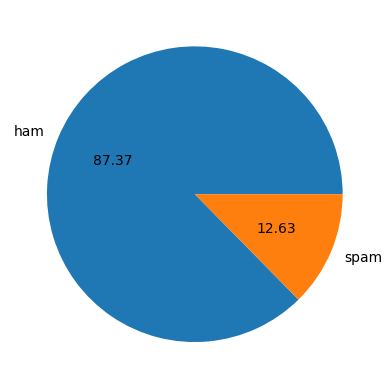

In [34]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
## plt.pie mtlb pie chart banega .value_couts kitni values hai and then labels hai and then floating point

In [ ]:
## data is Imbalance as there is more HAm

now we will dive deep in this
we will create 3 more colums
- no. of characters
- no.of words
- no. of sentences

for this we will use **NLTK** Natural language tool kit we have to install it

In [35]:
!pip install nltk

In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
df['num_characters']=df['text'].apply(len)

<ipython-input-40-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
#num of words
## word_tokenize(x) breaks sentences into words aur fir len to count length
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [46]:
#num of sentences
## sent_tokenize(x) breaks sentences  aur fir len to count length
df["num_Sentences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [47]:
df.head()

,target,text,num_characters,num_words,num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df[['num_characters','num_words','num_Sentences']].describe()

,num_characters,num_words,num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
# we can analyze spam and ham seperatedly
# for ham
df[df['target']==0][['num_characters','num_words','num_Sentences']].describe()


,num_characters,num_words,num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
# for spam
df[df['target']==1][['num_characters','num_words','num_Sentences']].describe()

,num_characters,num_words,num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


WE can notice in spam the mean wrd count is 137 meaning spam message is generally bigger

In [ ]:
# we will build histograms for both

In [53]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

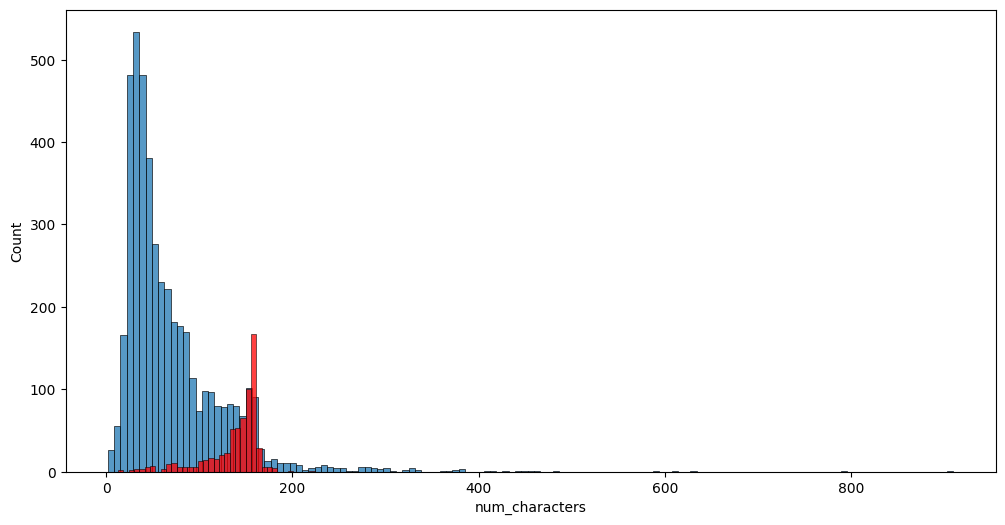

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

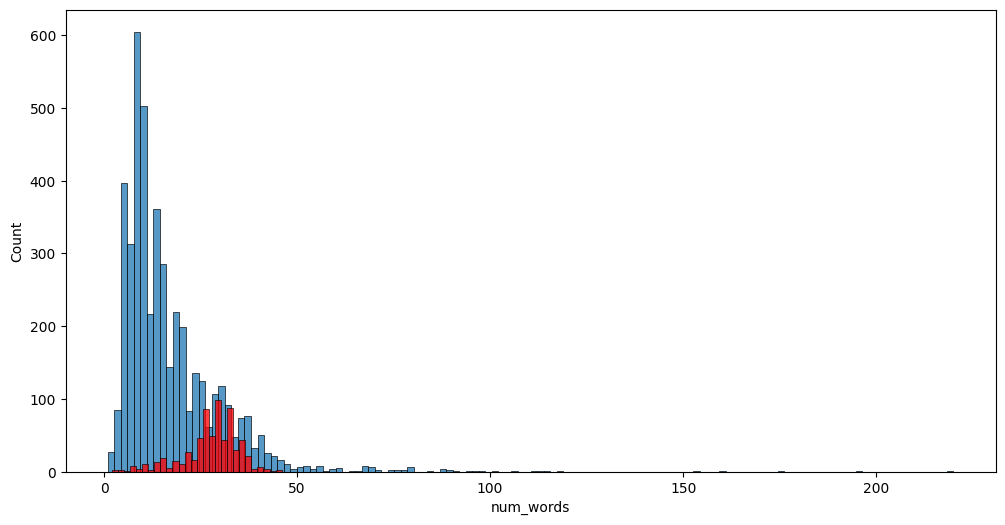

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

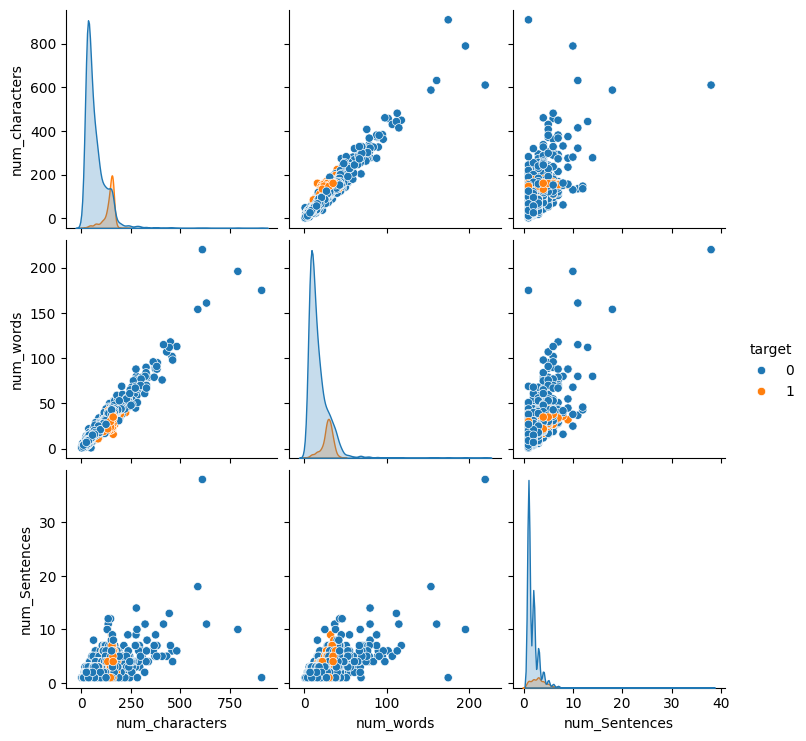

In [62]:
##finding relation b/w no. of words and sentences
sns.pairplot(df,hue='target')

In [63]:
sns.heatmap(df.corr())
#not working i dont know why it is show relation b/w each feature

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Data Preprocessing
- lowecase
-tokenization
-removing speacial characters
- removing stop words and puncuation
-stemming (making words like dance ,dancing,danced into dance)



In [88]:
def transform_text(text):
    ## converting to lowercase letter
    text=text.lower()
    ## seperating sentences into words
    text=nltk.word_tokenize(text)


    ## removing special char
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words("english") and i not in string.punctuation:
        y.append(i)
    text=y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [78]:
# showing you stop words

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
transform_text("hi how Are you going  to school tommorow Nishant")

'hi go school tommorow nishant'

In [84]:
# stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [91]:
df["transformed_text"]=df['text'].apply(transform_text)

In [92]:
df.head()

,target,text,num_characters,num_words,num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
